<a href="https://colab.research.google.com/github/tlysenko/KyivstarBigDataSchool/blob/master/Kyivstar_BigData_School_test_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Downloadin the files

In [2]:
#Mounting GoogleDrive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df_tab = pd.read_csv("/content/drive/My Drive/Datasets/Kyivstar/tabular_data.csv")
df_hash = pd.read_csv("/content/drive/My Drive/Datasets/Kyivstar/hashed_data.csv")
tgt_train = pd.read_csv("/content/drive/My Drive/Datasets/Kyivstar/train_target.csv")
tgt_test = pd.read_csv("/content/drive/My Drive/Datasets/Kyivstar/test_target.csv")

## Exploratory Data Analysis

#### **tabular_data.csv**

In [4]:
df_tab.head()

,PERIOD,ID,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,V_10,V_11,V_12,V_13,V_14,V_15,V_16,V_17,V_18,V_19,V_20,V_21,V_22,V_23,V_24,V_25,V_26,V_27,V_28,V_29,V_30,V_31,V_32,V_33,V_34,V_35,V_36,V_37,V_38,V_39,V_40,V_41,V_42,V_43
0,1,1,27.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,NaN,27.0,2.0,63.48,230.43,226.18,3.92,0.0,0.0,0.33,0.0,0.0,0.0,0.0,92.77,82.12,10.65,0.0,0.0,117.0,112.0,2.0,NaN,35.0,30.0,NaN,0.0,0.0,45.53,1.0550,0.0,0.0,45.53,0.0,0.0
1,2,1,19.0,0.0,NaN,1.0,1.0,0.0,1.0,0.0,NaN,19.0,2.0,NaN,134.75,132.03,2.03,0.0,0.0,0.69,1.0,0.0,0.0,0.0,162.48,162.48,0.00,0.0,NaN,54.0,48.0,2.0,0.0,44.0,44.0,0.0,0.0,0.0,48.00,NaN,NaN,0.0,48.00,0.0,0.0
2,3,1,22.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,22.0,1.0,21.98,159.08,158.08,1.00,0.0,0.0,0.00,0.0,NaN,0.0,0.0,180.90,180.90,0.00,0.0,0.0,39.0,38.0,1.0,0.0,33.0,33.0,0.0,0.0,NaN,46.59,0.0000,0.0,0.0,46.59,0.0,0.0
3,1,2,NaN,NaN,0.0,1.0,1.0,NaN,0.0,NaN,0.0,NaN,4.0,2.20,175.97,164.92,11.00,0.0,0.0,0.05,NaN,0.0,0.0,0.0,281.68,259.63,22.05,NaN,0.0,109.0,103.0,4.0,0.0,152.0,143.0,9.0,0.0,0.0,157.50,3.3075,0.0,0.0,157.50,0.0,0.0
4,2,2,28.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,28.0,8.0,73.93,367.20,339.73,27.47,0.0,0.0,NaN,0.0,0.0,0.0,0.0,504.13,479.53,24.60,0.0,0.0,233.0,222.0,11.0,0.0,288.0,279.0,NaN,0.0,0.0,157.50,3.6400,0.0,0.0,157.50,0.0,0.0


In [5]:
# There are three equal periods
df_tab['PERIOD'].value_counts()

3    4871
2    4871
1    4839
Name: PERIOD, dtype: int64

#### **Train and test IDs**

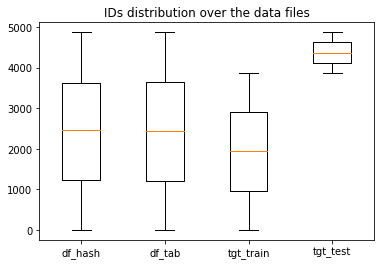

In [6]:
plt.boxplot([df_hash['ID'], df_tab['ID'], tgt_train['ID'], tgt_test['ID']], 
            labels=['df_hash', 'df_tab','tgt_train','tgt_test']);
plt.title('IDs distribution over the data files');

In [7]:
tgt_train['ID'].min(), tgt_train['ID'].max() , tgt_test['ID'].min(), tgt_test['ID'].max()

(1, 3871, 3872, 4871)

*Train IDs: 1:3871, Test IDs: 3872:4871 inclusive*

#### **df_hash**

In [8]:
df_hash.head()

,ID,HASH
0,1,045344e350db36e5aa27d44707026c693b6fbc51334849...
1,1,0da6f000eee23b4abe52552caaa9ae50a43bb7035ea546...
2,2,bb375651ea14bd2a97b0bd2a11e272632c2a4e432d3e6b...
3,2,deb9f62d9f47a9f8eebf4173a114eb849c2efca1d82f13...
4,2,34757104bdbaa55abc049fb2efad6ea1d449fbba455793...


In [9]:
llen = []
idx = []
for i in range(0,len(df_hash['ID'])):
  llen.append(len(df_hash[df_hash['ID']==i]))
  idx.append(i)
print(min(llen), max(llen))

0 73


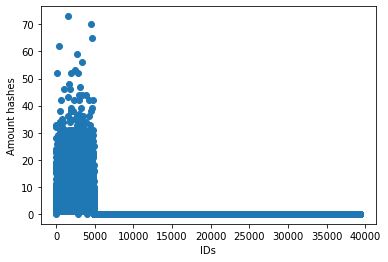

In [10]:
plt.scatter(x = idx , y = llen);
plt.xlabel('IDs');
plt.ylabel('Amount hashes');

*There are a lot of unsued ids in the hashed_data.csv that need to be cleaned up.*

*Each ID has up to 73 hash values disclosing many to many relationship*

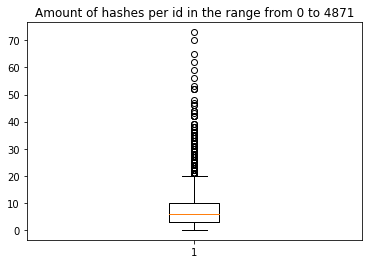

In [11]:
plt.boxplot(llen[:4871]);
plt.title('Amount of hashes per id in the range from 0 to 4871');

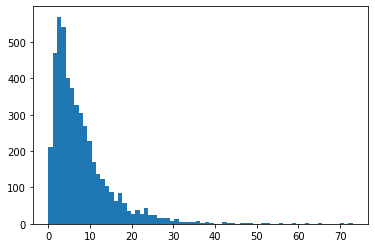

In [12]:
plt.hist(llen[:4871],bins=70);

In [0]:
# Removing ids that are not present in our training and test datat
df_hash2 = df_hash[df_hash['ID']<=4871]

In [0]:
# Label encoder for hashes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_hash2['hs'] = le.fit_transform(df_hash2['HASH'])

In [15]:
df_hash2.head()

,ID,HASH,hs
0,1,045344e350db36e5aa27d44707026c693b6fbc51334849...,61
1,1,0da6f000eee23b4abe52552caaa9ae50a43bb7035ea546...,210
2,2,bb375651ea14bd2a97b0bd2a11e272632c2a4e432d3e6b...,2975
3,2,deb9f62d9f47a9f8eebf4173a114eb849c2efca1d82f13...,3573
4,2,34757104bdbaa55abc049fb2efad6ea1d449fbba455793...,838


In [0]:
# Dataframe for storing the matrix
new_ohe = pd.get_dummies(df_hash2, columns = ['hs']).groupby(['ID'],as_index=False).sum()

In [18]:
new_ohe.head()

,ID,hs_0,hs_1,hs_2,hs_3,hs_4,hs_5,hs_6,hs_7,hs_8,hs_9,hs_10,hs_11,hs_12,hs_13,hs_14,hs_15,hs_16,hs_17,hs_18,hs_19,hs_20,hs_21,hs_22,hs_23,hs_24,hs_25,hs_26,hs_27,hs_28,hs_29,hs_30,hs_31,hs_32,hs_33,hs_34,hs_35,hs_36,hs_37,hs_38,...,hs_4072,hs_4073,hs_4074,hs_4075,hs_4076,hs_4077,hs_4078,hs_4079,hs_4080,hs_4081,hs_4082,hs_4083,hs_4084,hs_4085,hs_4086,hs_4087,hs_4088,hs_4089,hs_4090,hs_4091,hs_4092,hs_4093,hs_4094,hs_4095,hs_4096,hs_4097,hs_4098,hs_4099,hs_4100,hs_4101,hs_4102,hs_4103,hs_4104,hs_4105,hs_4106,hs_4107,hs_4108,hs_4109,hs_4110,hs_4111
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
new_ohe.shape , df_tab.shape

((4869, 4113), (14581, 45))

### Data preparation

* Imputting missing values in df_tab columns V_1:V_43
* Adding hashed categorical variable data
* Adding hashed variable data
* Scaling the data
* Split for train, test and sumbission datasets



#### **Imputting missing values in df_tab columns V_1:V_43**

In [0]:
from sklearn.impute import SimpleImputer
imp_ = SimpleImputer(missing_values=np.nan, strategy='median')

df_tab.loc[:,'V_1':'V_43'] = df_tab.loc[:,'V_1':'V_43'].fillna(np.nan)
df_tab.loc[:,'V_1':'V_43'] = imp_.fit_transform(df_tab.loc[:,'V_1':'V_43'].values)

#### **Adding hashed categorical variable data**

In [0]:
# Groupby Period and drop period variable
df_tab = df_tab.loc[:,'ID':'V_43'].groupby(['ID'],as_index=False).sum()

In [0]:
# Concat dataframes
df_final = pd.merge(df_tab, 
                   new_ohe, 
                   on = 'ID')

In [25]:
df_tab.shape, new_ohe.shape, df_final.shape,

((4871, 44), (4869, 4113), (4869, 4156))

In [26]:
# Identifying missing IDs. 
s1 = set(df_tab['ID'])
s2 = set(new_ohe['ID'])
s1.difference(s2)

{2855, 3993}

*There is one ID missing in the train data and we won't impute it and there is one id missing in the test data. We'll have to insert this value in the final list to make sure the prediction file has correct lenghts. 

In [28]:
df_final.head()

,ID,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,V_10,V_11,V_12,V_13,V_14,V_15,V_16,V_17,V_18,V_19,V_20,V_21,V_22,V_23,V_24,V_25,V_26,V_27,V_28,V_29,V_30,V_31,V_32,V_33,V_34,V_35,V_36,V_37,V_38,V_39,...,hs_4072,hs_4073,hs_4074,hs_4075,hs_4076,hs_4077,hs_4078,hs_4079,hs_4080,hs_4081,hs_4082,hs_4083,hs_4084,hs_4085,hs_4086,hs_4087,hs_4088,hs_4089,hs_4090,hs_4091,hs_4092,hs_4093,hs_4094,hs_4095,hs_4096,hs_4097,hs_4098,hs_4099,hs_4100,hs_4101,hs_4102,hs_4103,hs_4104,hs_4105,hs_4106,hs_4107,hs_4108,hs_4109,hs_4110,hs_4111
0,1,68.0,0.0,0.0,3.0,3.0,0.0,1.0,0.0,0.0,68.0,5.0,135.825,524.26,516.29,6.95,0.0,0.0,1.02,1.0,0.0,0.0,0.000000,436.150,425.50,10.65,0.00,0.0,210.0,198.0,5.0,0.0,112.0,107.0,5.0,0.0,0.0,140.12,2.322500,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,82.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,80.0,19.0,86.060,775.24,711.85,62.39,0.0,0.0,1.30,0.0,0.0,0.0,0.000000,1071.825,985.61,52.12,0.00,0.0,474.0,444.0,17.0,0.0,594.0,571.0,19.0,0.0,0.0,370.00,7.767500,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,80.0,60.0,10.0,3.0,3.0,0.0,3.0,3.0,1.0,80.0,39.0,90.520,1352.78,1205.68,99.27,0.0,0.0,5.14,13.0,4.0,0.0,7004.196094,1426.330,1327.67,98.66,0.02,0.0,558.0,406.0,61.0,0.0,414.0,448.0,43.0,1.0,0.0,535.47,201.802212,57.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,64.0,69.0,1.0,3.0,3.0,0.0,2.0,3.0,0.0,59.0,22.0,288.605,1165.54,1066.18,98.07,0.0,0.0,1.29,27.0,1.0,0.0,14803.948863,613.970,520.64,32.10,0.02,0.0,255.0,252.0,13.0,0.0,178.0,148.0,29.0,0.0,0.0,285.00,4.767932,69.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,83.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,79.0,1.0,158.000,558.98,546.13,2.13,0.0,0.0,10.72,0.0,0.0,0.0,0.000000,723.265,588.74,13.87,0.00,0.0,322.0,271.0,3.0,0.0,303.0,300.0,3.0,0.0,0.0,170.00,0.815833,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
# There are no missing values in the final dataframe
sum(df_final.isna().sum())

0

#### **Scaling**

In [0]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
df_final.loc[:, 'V_1':] = feature_scaler.fit_transform(df_final.loc[:, 'V_1':])

In [31]:
df_final.head()

,ID,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,V_10,V_11,V_12,V_13,V_14,V_15,V_16,V_17,V_18,V_19,V_20,V_21,V_22,V_23,V_24,V_25,V_26,V_27,V_28,V_29,V_30,V_31,V_32,V_33,V_34,V_35,V_36,V_37,V_38,V_39,...,hs_4072,hs_4073,hs_4074,hs_4075,hs_4076,hs_4077,hs_4078,hs_4079,hs_4080,hs_4081,hs_4082,hs_4083,hs_4084,hs_4085,hs_4086,hs_4087,hs_4088,hs_4089,hs_4090,hs_4091,hs_4092,hs_4093,hs_4094,hs_4095,hs_4096,hs_4097,hs_4098,hs_4099,hs_4100,hs_4101,hs_4102,hs_4103,hs_4104,hs_4105,hs_4106,hs_4107,hs_4108,hs_4109,hs_4110,hs_4111
0,1,-0.008619,-0.774058,-0.423317,0.314064,0.842440,-0.246113,0.081423,-1.025233,-0.178744,0.095802,-0.512256,-0.414552,-0.504809,-0.468069,-0.402791,-0.075898,-0.066862,-0.252067,-0.142137,-0.165994,-0.069838,-0.282466,-0.669730,-0.615179,-0.470590,-0.076054,-0.072594,-0.568652,-0.515539,-0.385588,-0.094687,-0.865376,-0.818808,-0.519491,-0.096729,-0.076695,-0.328098,-0.227087,-0.683797,...,-0.037944,-0.035126,-0.014333,-0.014333,-0.020271,-0.028674,-0.014333,-0.014333,-0.014333,-0.014333,-0.014333,-0.040568,-0.014333,-0.035126,-0.014333,-0.020271,-0.014333,-0.014333,-0.014333,-0.014333,-0.020271,-0.103899,-0.020271,-0.014333,-0.014333,-0.014333,-0.014333,-0.020271,-0.02483,-0.014333,-0.028674,-0.014333,-0.014333,-0.02483,-0.014333,-0.014333,-0.049706,-0.043033,-0.020271,-0.014333
1,2,0.514557,-0.774058,-0.423317,0.314064,0.842440,-0.246113,-0.840549,-1.025233,-0.178744,0.522703,0.295891,-0.566255,-0.309311,-0.313615,0.066767,-0.075898,-0.066862,-0.241942,-0.156623,-0.165994,-0.069838,-0.282466,-0.097969,-0.107363,-0.075572,-0.076054,-0.072594,0.068996,0.131449,-0.209973,-0.094687,0.500162,0.594685,-0.281861,-0.096729,-0.076695,0.689709,-0.177850,-0.683797,...,-0.037944,-0.035126,-0.014333,-0.014333,-0.020271,-0.028674,-0.014333,-0.014333,-0.014333,-0.014333,-0.014333,-0.040568,-0.014333,-0.035126,-0.014333,-0.020271,-0.014333,-0.014333,-0.014333,-0.014333,-0.020271,-0.103899,-0.020271,-0.014333,-0.014333,-0.014333,-0.014333,-0.020271,-0.02483,-0.014333,-0.028674,-0.014333,-0.014333,-0.02483,-0.014333,-0.014333,-0.049706,-0.043033,-0.020271,-0.014333
2,3,0.439818,1.017679,0.708239,0.314064,0.842440,-0.246113,1.925366,1.287241,1.224971,0.522703,1.450387,-0.552659,0.140557,0.076411,0.379127,-0.075898,-0.066862,-0.103086,0.031701,0.075682,-0.069838,0.208199,0.220892,0.202761,0.367739,-0.075897,-0.072594,0.271884,0.031508,0.433950,-0.094687,-0.009790,0.219988,0.125505,-0.039669,-0.076695,1.422336,1.576727,1.119440,...,-0.037944,-0.035126,-0.014333,-0.014333,-0.020271,-0.028674,-0.014333,-0.014333,-0.014333,-0.014333,-0.014333,-0.040568,-0.014333,-0.035126,-0.014333,-0.020271,-0.014333,-0.014333,-0.014333,-0.014333,-0.020271,-0.103899,-0.020271,-0.014333,-0.014333,-0.014333,-0.014333,-0.020271,-0.02483,-0.014333,-0.028674,-0.014333,-0.014333,-0.02483,-0.014333,-0.014333,-0.049706,-0.043033,-0.020271,-0.014333
3,4,-0.158098,1.286439,-0.310161,0.314064,0.842440,-0.246113,1.003394,1.287241,-0.178744,-0.224374,0.469066,0.051183,-0.005291,-0.033766,0.368964,-0.075898,-0.066862,-0.242304,0.234512,-0.105575,-0.069838,0.754595,-0.509789,-0.528922,-0.266270,-0.075897,-0.072594,-0.459962,-0.373518,-0.268512,-0.094687,-0.678394,-0.693909,-0.112125,-0.096729,-0.076695,0.313366,-0.204974,1.499069,...,-0.037944,-0.035126,-0.014333,-0.014333,-0.020271,-0.028674,-0.014333,-0.014333,-0.014333,-0.014333,-0.014333,-0.040568,-0.014333,-0.035126,-0.014333,-0.020271,-0.014333,-0.014333,-0.014333,-0.014333,-0.020271,-0.103899,-0.020271,-0.014333,-0.014333,-0.014333,-0.014333,-0.020271,-0.02483,-0.014333,-0.028674,-0.014333,-0.014333,-0.02483,-0.014333,-0.014333,-0.049706,-0.043033,-0.020271,-0.014333
4,5,0.551927,-0.774058,-0.423317,0.314064,-0.048683,-0.246113,-0.840549,-1.025233,-0.178744,0.487128,-0.743155,-0.346953,-0.477764,-0.444501,-0.443615,-0.075898,-0.066862,0.098689,-0.156623,-0.165994,-0.069838,-0.282466,-0.411483,-0.467180,-0.439918,-0.076054,-0.072594,-0.298135,-0.323547,-0.414858,-0.094687,-0.324260,-0.230868,-0.553438,-0.096729,-0.076

#### **Split for train, test and sumbission datasets**

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = df_final[df_final['ID'] <= tgt_train['ID'].max()] # Train data without target variable
Tst = df_final[df_final['ID'] > tgt_train['ID'].max()] # Test data for the final submission

In [34]:
# There is one missing id in the test dataset that needs to be inserted on the final stage
Tst.shape, tgt_test.shape

((999, 4156), (1000, 2))

In [0]:
# Add target variable to the data
Xy = pd.merge(tgt_train, 
              X, 
              on = 'ID')

In [37]:
X.shape, Xy.shape

((3870, 4156), (3870, 4157))

In [0]:
y = Xy['TARGET']
X = Xy.drop(['TARGET'], axis = 1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=777)

## Selecting the optimal model for finetuning

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score , accuracy_score



In [0]:
def get_score():
  seed = 11

  results = []
  names = []
  scoring = 'roc_auc'

  for name, model in models:
        strat = StratifiedKFold(n_splits=10, random_state=seed)

        cv_results = cross_val_score(model, X_train, y_train, cv=strat, scoring=scoring)
        
        results.append(cv_results)
        names.append(name)
        
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
  return results

In [0]:
models = []
models.append(('LR', LogisticRegression(random_state=11, solver="saga", penalty="l1", class_weight="balanced", C=1.0, max_iter=500))) 
models.append(('KNN', KNeighborsClassifier()))
models.append(('DecTree', DecisionTreeClassifier())) 
models.append(('RF', RandomForestClassifier(n_estimators = 10))) 
models.append(('XGB', XGBClassifier()))

In [0]:
mod_list = []
for mod , _ in models:
  mod_list.append(mod)
mod_list.append('Cleaning')

df_boxplot = pd.DataFrame(columns=['Score', 'ML'])

In [0]:
def append_res_to_boxplot(results, df):
  i = 0
  while i < len(results[0]):
    line = []
    for num, ml in zip(results, mod_list): 
      line.append([num[i],ml])
    i = i+1
    df = df.append(pd.DataFrame(line, columns=['Score', 'ML']),ignore_index=True)
  return df

In [45]:
results = get_score()
df_boxplot = append_res_to_boxplot(results, df_boxplot)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

LR: 0.651233 (0.034588)
KNN: 0.507978 (0.031938)
DecTree: 0.570726 (0.012845)
RF: 0.616415 (0.043225)
XGB: 0.686762 (0.033019)


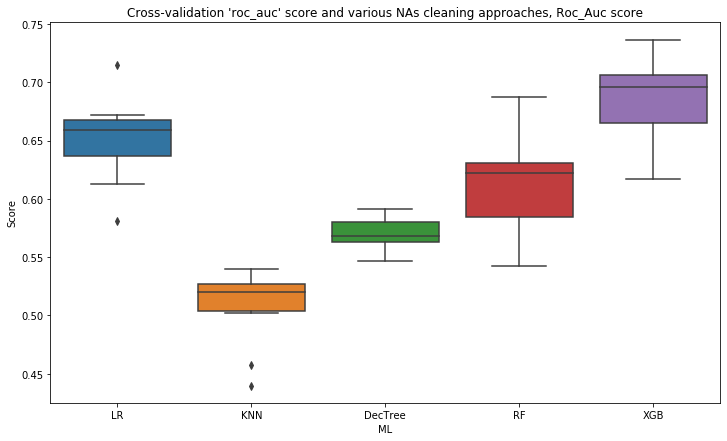

In [46]:
# Plotting the results 
plt.figure(figsize=(12,7))
plt.title("Cross-validation 'roc_auc' score and various NAs cleaning approaches, Roc_Auc score")
sns.boxplot(data = df_boxplot, x = 'ML',y='Score');

*XGBoost shows the best performance, let's finetune it further*

## Finetuning XGBoost

In [0]:
xgb = XGBClassifier()

In [0]:
# Relatively small grid of parameters due to time and computational resources limitations
grid = {'nthread':[4], 
              'objective':['binary:logistic'],
              'learning_rate': [0.05, 0.06], 
              'max_depth': [6,7],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [1000], 
              'seed': [777]}

In [0]:
clf = GridSearchCV(xgb, grid, n_jobs=-1, 
                   cv=StratifiedKFold(n_splits=3, shuffle=True), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

In [50]:
clf.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 31.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 31.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
             error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, obj...
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.05, 0.06], 'max_depth': [6, 7],
                         'min_child_weight': [11], 'n_estimators': [1000],
                         'nthread': [4], 'objective': ['binary:logistic'],
 

In [53]:
clf.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.05,
 'max_depth': 6,
 'min_child_weight': 11,
 'n_estimators': 1000,
 'nthread': 4,
 'objective': 'binary:logistic',
 'seed': 777,
 'silent': 1,
 'subsample': 0.8}

#### **Model Evaluation**

In [55]:
clf.best_score_

0.646728865114057

In [78]:
roc_auc_score(y_test, clf.predict(X_test))

0.5695860582639715

In [83]:
accuracy_score(y_test, clf.predict(X_test))

0.6933677863910422

In [84]:
confusion_matrix(y_test, clf.predict(X_test))

array([[711, 130],
       [226,  94]])

**Reveived ROC_AUC Metrics are rather weak and require furhter finetuning and feature engineering.** 

## Submitting prediction

In [0]:
prob = clf.predict_proba(Tst)

In [73]:
# Missing element from the prediction
list(s1.difference(s2))[0]

3993

In [74]:
list(tgt_test['ID']).index(3993)

121

In [0]:
with open("/content/drive/My Drive/Datasets/Kyivstar/LysenkoTetiana_test.txt",'w') as f:
  f.write("ID, SCORE"+'\n')
  prob = list(prob)
  
  #There is a missing value of ID 3993 at position 121 in the list
  a = np.array((0.5,0.50000),dtype='float32')
  prob.insert(121, a)
  
  for idx, p in zip(tgt_test['ID'] , prob):
    # p[1] corresponds to selecting the probability of the class "1"
    f.write( str(idx) + ',' + str(p[1])+ '\n' )

In [0]:
tt = pd.read_csv('/content/drive/My Drive/Datasets/Kyivstar/LysenkoTetiana_test.txt')

In [77]:
#Check if one missing ID was inserted correctly
sum(tt['ID'] == tgt_test['ID'])

1000